In [1]:
# test segmentation

from otsu_seg import segment_images,segment_images_analysis

# segmentation("images/dishes/IMG_8873.JPG", 8873, 801, -11, 300)
import os
import glob
from tqdm import tqdm

In [2]:
import cv2
import matplotlib.pyplot as plt 
from IPython.display import display
import numpy as np
import pandas as pd

In [3]:
# get all images in the dishes folder
images = glob.glob("images/dishes/*")

# make a dictionary to store the length and area of the contours
info_dict = {}


# use the last 4 digits of the image name as the image number   
for image in tqdm(images):
    image_number = int(image.split("/")[-1].split(".")[0][-4:])
    contour_number,len_area_list,contours = segment_images_analysis(image_path = image, kernel_size = (90,90))
    info_dict[image_number] = [contour_number,len_area_list,contours]

    



100%|██████████| 121/121 [00:43<00:00,  2.76it/s]


In [4]:
# find the image with the most contours, plot the contours and show the image
max_contour = 0
max_contour_image = ""
for image_number in info_dict:
    if info_dict[image_number][0] > max_contour:
        max_contour = info_dict[image_number][0]
        max_contour_image = image_number
        max_contour_contours = info_dict[image_number][2]

print(f"Image {max_contour_image} has the most contours: {max_contour}")

# find the entry of the image with the most contours in the dictionary
max_contour_info = info_dict[max_contour_image]

contours = max_contour_info[2]

# print the length and area of the contours
len_area_list = max_contour_info[1]
# create a list to store the contours, the length, and the contour area
contour_info_ori = []
for i in range(len(contours)):
    contour_info_ori.append([contours[i],len_area_list[i][0],len_area_list[i][1]])

Image 8923 has the most contours: 19


In [5]:

# show the length, and area with pandas dataframe
contour_info_df = pd.DataFrame(contour_info_ori,columns = ["Contour","Length","Area"])

# only show length and areas
contour_info_df_display = contour_info_df.drop(columns = ["Contour"])


# sort the dataframe by area
contour_info_df_display = contour_info_df_display.sort_values(by = "Area",ascending = False)
display(contour_info_df_display)



,Length,Area
17,689833.0,3395.606328
7,79239.5,1878.256920
2,121436.5,1604.648836
5,27574.5,982.859952
9,31474.0,813.102593
6,10677.5,784.409161
8,11838.0,641.656854
11,12014.0,583.112698
0,7659.0,382.828427
18,3133.0,314.970562


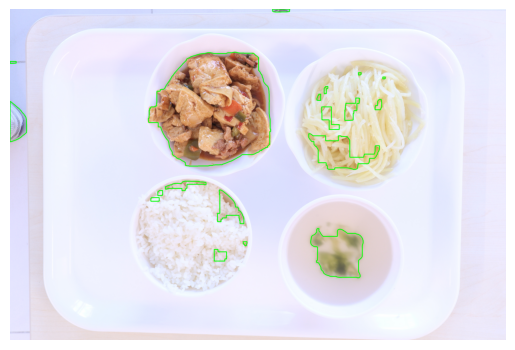

In [6]:
# plot the image and the contours
image_path = f"images/dishes/IMG_{max_contour_image}.JPG"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

cv2.drawContours(image, contours, -1, (0, 255, 0), 5)
plt.imshow(image)
plt.axis("off")
plt.show()


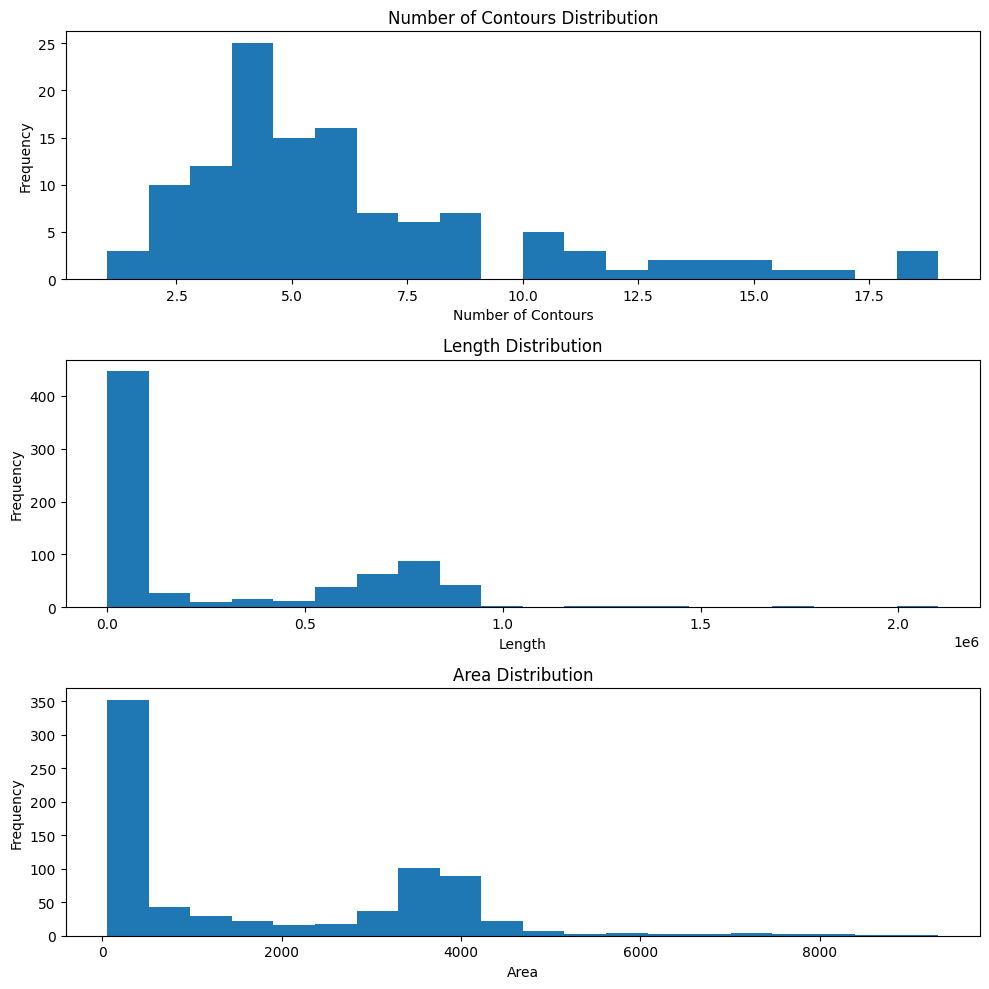

In [7]:
# plot contours and areas distribution histograms in the dictioanry

# plot the histogram of the number of contours
contour_number_list = [info_dict[image][0] for image in info_dict]

length_list = []
for image in info_dict:
    for length, area in info_dict[image][1]:
        length_list.append(length)

area_list = []
for image in info_dict:
    for length, area in info_dict[image][1]:
        area_list.append(area)


# plot three histograms in one figure
fig, axs = plt.subplots(3, 1, figsize = (10,10))
axs[0].hist(contour_number_list, bins = 20)
axs[0].set_title("Number of Contours Distribution")
axs[0].set_xlabel("Number of Contours")
axs[0].set_ylabel("Frequency")

axs[1].hist(length_list, bins = 20)
axs[1].set_title("Length Distribution")
axs[1].set_xlabel("Length")
axs[1].set_ylabel("Frequency")

axs[2].hist(area_list, bins = 20)
axs[2].set_title("Area Distribution")
axs[2].set_xlabel("Area")
axs[2].set_ylabel("Frequency")

plt.tight_layout()
plt.show()



In [8]:
# set the threshold for the length of the contours and the area of the contours

length_threshold_low = 300000
length_threshold_high = 900000
area_threshold_low = 2000
area_threshold_high = 5000

# filter out the contours in the contour_info_df
contour_info_filtered = contour_info_df[(contour_info_df["Length"] > length_threshold_low) & (contour_info_df["Length"] < length_threshold_high) & (contour_info_df["Area"] > area_threshold_low) & (contour_info_df["Area"] < area_threshold_high)]



In [9]:
# show filtered dataframe
display(contour_info_filtered)


,Contour,Length,Area
17,"[[[1797, 346]], [[1796, 347]], [[1794, 347]], ...",689833.0,3395.606328


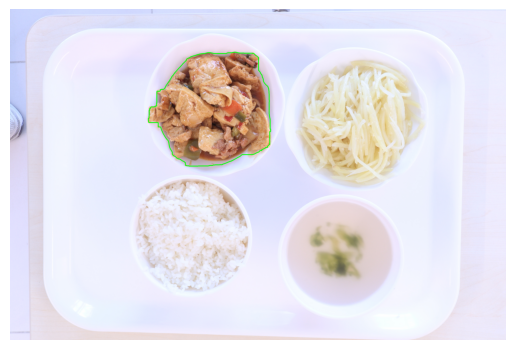

In [10]:
# now load the image and plot the filtered contours
image_path = f"images/dishes/IMG_8923.JPG"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

contours = contour_info_filtered["Contour"].values
# convert contours to numpy array
contours = np.array(contours)

# plot the image and the contours
cv2.drawContours(image, contours, -1, (0, 255, 0), 5)
plt.imshow(image)
plt.axis("off")
plt.show()
